In [2]:
#import data
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name'], header=None)

In [3]:
#import plot functionality
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [45]:
data.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


4 features: sepal length, sepal width, petal length, and petal width, all numeric.

In [5]:
#basic summary statistics; excludes range and variance
data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.var()

Sepal Length    0.685694
Sepal Width     0.188004
Petal Length    3.113179
Petal Width     0.582414
dtype: float64

In [70]:
#given a data frame and a feature existing within that frame,
#print the range of the series
#only valid with numeric features
def range(frame, feature):
    subset = frame[feature]
    range = subset.max()-subset.min()
    print ("%s range = %.2f" %(feature, range))

In [71]:
range(data, 'Sepal Length')
range(data, 'Sepal Width')
range(data, 'Petal Length')
range(data, 'Petal Width')

Sepal Length range = 3.60
Sepal Width range = 2.40
Petal Length range = 5.90
Petal Width range = 2.40


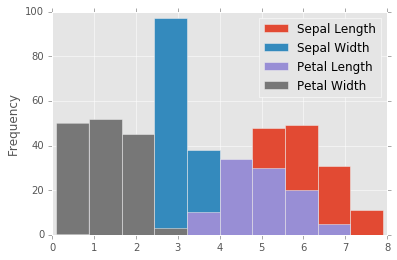

In [9]:
data.plot(kind='hist')

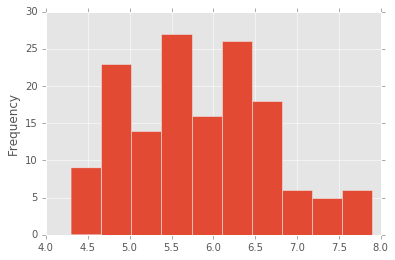

In [30]:
data['Sepal Length'].plot(kind='hist')

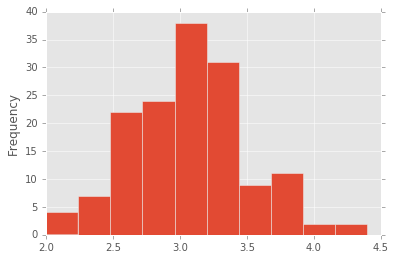

In [31]:
data['Sepal Width'].plot(kind='hist')

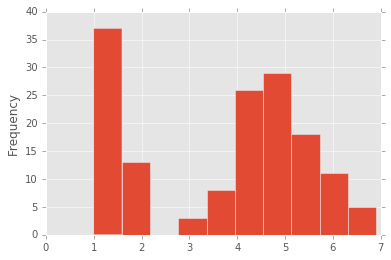

In [32]:
data['Petal Length'].plot(kind='hist')

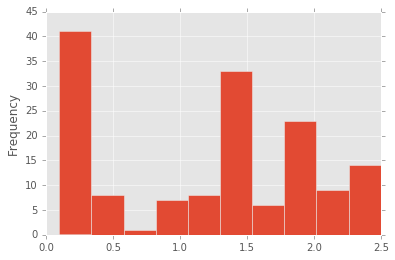

In [33]:
data['Petal Width'].plot(kind='hist')

Sepal length and width show a more even, approximately standard distribution than the corresponding petal measurements, which are instead bimodal. Petal length especially could be split into two segments, one with length < 2.5 and one with length > 2.5.

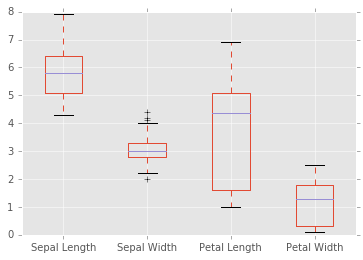

In [10]:
data.plot(kind='box')

The median values for each feature are quite distinct. Petal length shows the widest distribution, while sepal width shows the narrowest. Sepal width is thus a less useful measurement for categorizing the irises. Different groups of irises are much more likely to have noticeably different petal lengths.

In [43]:
setosa = data.groupby('Name').get_group('Iris-setosa')
versicolor = data.groupby('Name').get_group('Iris-versicolor')
virginica = data.groupby('Name').get_group('Iris-virginica')

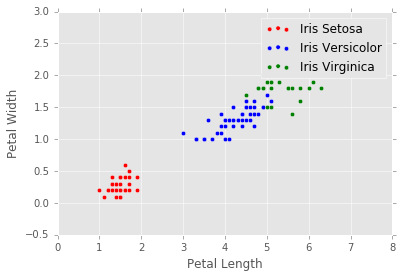

In [47]:
ax = setosa.plot.scatter(x='Petal Length', y='Petal Width', color='Red', label='Iris Setosa')
bx = versicolour.plot.scatter(x='Petal Length', y='Petal Width', color='Blue', label='Iris Versicolor', ax=ax)
cx = virginica.plot.scatter(x='Petal Length', y='Petal Width', color='Green', label='Iris Virginica', ax=bx)

In [48]:
#given two features of this dataset, creates a scatterplot, showing the
#three varieties of irises in different colors
def plot_by_features(feature1, feature2):
    ax = setosa.plot.scatter(x=feature1, y=feature2, color='Red', label='Iris Setosa')
    bx = versicolour.plot.scatter(x=feature1, y=feature2, color='Blue', label='Iris Versicolor', ax=ax)
    cx = virginica.plot.scatter(x=feature1, y=feature2, color='Green', label='Iris Virginica', ax=bx)

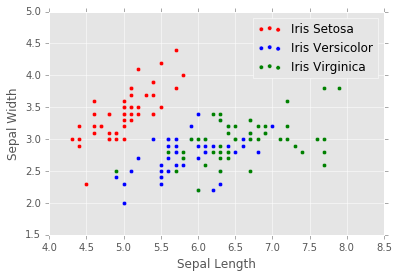

In [49]:
plot_by_features('Sepal Length', 'Sepal Width')

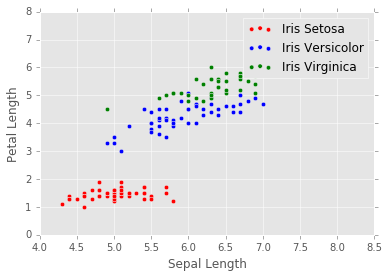

In [50]:
plot_by_features('Sepal Length', 'Petal Length')

In [11]:
digitsURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra'
digits = pd.read_csv(digitsURL, names=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Class'])

In [12]:
digits.head(5)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


16 features (here named A-P), all numeric.

In [13]:
#describe data excluding the class identifier
digits.drop('Class', axis=1).describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
count,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000,7494.000000
mean,37.384307,84.679343,40.005604,82.889512,50.878303,65.044436,51.471844,44.599680,57.129971,34.069122,61.417401,35.782092,54.699760,35.800774,46.813718,28.565386
std,33.322024,16.848420,26.256025,19.638582,34.927201,27.377341,30.680075,30.659478,33.680340,27.459989,37.130762,27.495836,22.599781,33.223611,41.531794,35.811094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,76.000000,20.000000,70.000000,17.000000,48.000000,28.000000,22.000000,30.000000,7.000000,25.000000,12.000000,41.000000,7.000000,0.000000,0.000000
50%,31.000000,89.000000,39.000000,89.000000,56.000000,71.000000,54.000000,42.000000,60.000000,33.000000,74.000000,32.000000,53.000000,28.000000,39.000000,8.000000
75%,61.000000,100.000000,58.000000,100.000000,81.000000,86.000000,75.000000,65.000000,88.000000,55.000000,98.000000,57.000000,69.000000,48.000000,100.000000,51.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [14]:
digits.drop('Class', axis=1).var()

A    1110.357293
B     283.869273
C     689.378856
D     385.673898
E    1219.909384
F     749.518778
G     941.266990
H     940.003609
I    1134.365329
J     754.051007
K    1378.693497
L     756.020974
M     510.750095
N    1103.808295
O    1724.889891
P    1282.434467
dtype: float64

For all columns, max = 100 and min = 0. So, range = 100, for all columns. (This is a deliberate characteristic of the dataset, as described by its creators.)

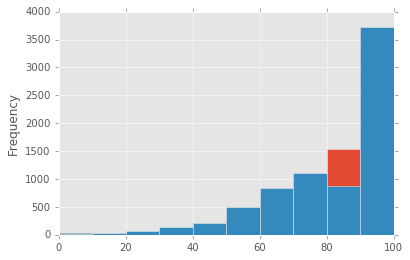

In [25]:
digits['B'].plot(kind='hist')
digits['D'].plot(kind='hist')

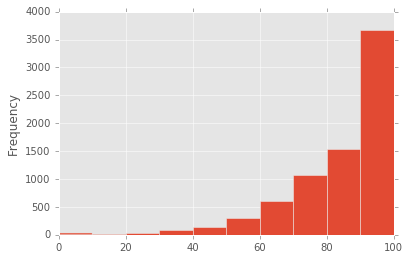

In [28]:
digits['B'].plot(kind='hist')

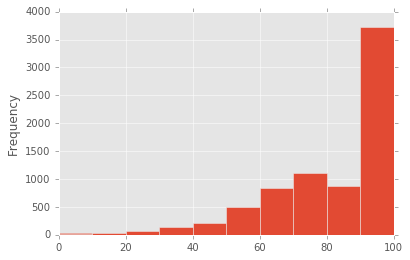

In [27]:
digits['D'].plot(kind='hist')

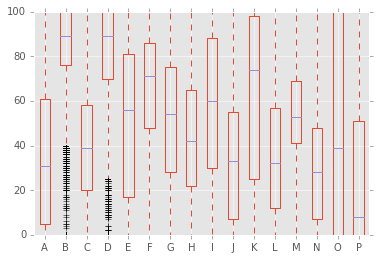

In [29]:
digits.drop('Class', axis=1).plot(kind='box')

Both B and D show outliers in their boxplots. In each case, the mean value is between 80 and 85, with a standard deviation between 16 and 20. (These are the smallest standard deviations in the dataset.) For both features the measurements are clustered in the upper range, between 70 and 100.